### Домашнее задание Transformers Training (50 баллов)

В этом домашнем задании требуется обучить несколько Transformer-based моделей в задаче машинного перевода. Для обучения можно воспользоваться текущим проектом, так и реализовать свой пайплайн обучения. Если будете использовать проект, теги **TODO** проекта отмечают, какие компоненты надо реализовать.
В ноутбуке нужно только отобразить результаты обучения и выводы. Архитектура модели(количетсво слоев, размерность и тд) остается на ваш выбор.

Ваш код обучения нужно выложить на ваш github, в строке ниже дать ссылку на него. В первую очередь будут оцениваться результаты в ноутбуке, код нужен для проверки адекватности результатов. 

Обучать модели до конца не нужно, только для демонстрации, что модель обучается и рабочая - снижение val_loss, рост bleu_score.

#### Сcылка на ваш github с проектом(вставить свой) - https://github.com/Fakazuma/HW3

Ноутбук с результатами выкладывать на ваш **google диск** курса. 

### Данные

`
wget https://www.manythings.org/anki/rus-eng.zip && unzip rus-eng.zip
`

Модели нужно обучить на задаче перевода с английского на русский. 

### Обучение Seq2seq Transformer модель(25 баллов)

Реализуйте Seq2seq Transformer. В качестве блока трансформера можно использовать https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html. В качестве токенизатора воспользуйтесь HuggingFace токенизатор для source/target языков - https://huggingface.co/docs/transformers/fast_tokenizers
В качестве максимальной длинны возьмите предложения длинной **до 15 слов**, без каких либо префиксов. 

Не забудьте остальные элементы модели:
* Мы можем использовать 1 трансформер как энкодер - декодером будет выступать линейный слой. 
* Обучите свой BPE токенизатор - https://huggingface.co/docs/transformers/fast_tokenizers
* Матрицу эмбеддингов токенов
* Матрицу позицонных эмбеддингов
* Линейный слой проекции в target словарь
* Функцию маскирования будущих состояний attention, так как модель авто-регрессионна
* Learning rate schedualer


В качестве результатов, приложите слудующие данные:
1) Параметры обучения - learning rate, batch_size, epoch_num, размерность скрытого слоя, количетсво слоев
2) Графики обучения - train loss, val loss, bleu score
3) Примеры переводов вашей модели(10 штук) - source text, true target text, predicted target text

In [26]:
import json
import ast

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
logs = []
with open('./training_logs/progress_log.txt', 'r') as f:
    cfg = ast.literal_eval(f.readline())
    for line in f.readlines():
        logs.append(ast.literal_eval(line))      

In [28]:
steps = np.arange(len(logs))
train_loss = []
val_loss = []
bleu_score = []

for log in logs:
    train_loss.append(log['train_loss'])
    val_loss.append(log['val_loss'])
    bleu_score.append(log['bleu_score'])

## Params

In [29]:
cfg

{'embedding_size': 100,
 'hidden_size': 100,
 'learning_rate': 0.001,
 'epoch_num': 10000,
 'try_one_batch': True,
 'max_seq_len': 200,
 'max_vocab_size': 4000,
 'sched_step_size': 100,
 'sched_gamma': 0.1,
 'nhead': 5,
 'num_layers': 5,
 'dim_feedforward': 1024}

## Train results

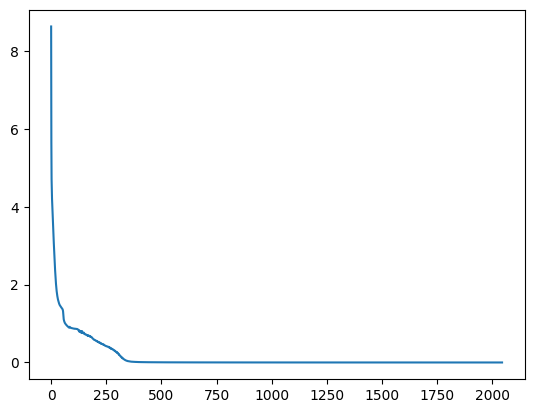

In [30]:
plt.plot(steps, train_loss);

## Val results

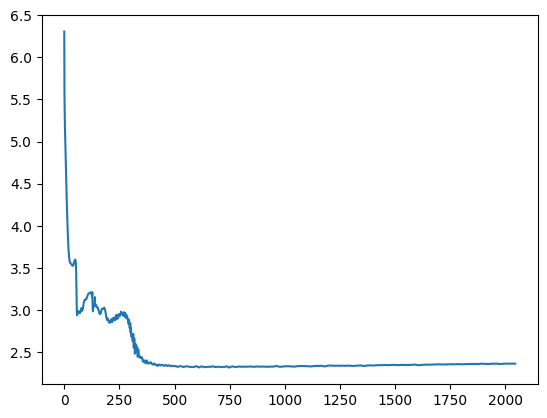

In [31]:
plt.plot(steps, val_loss);

## Bleu score

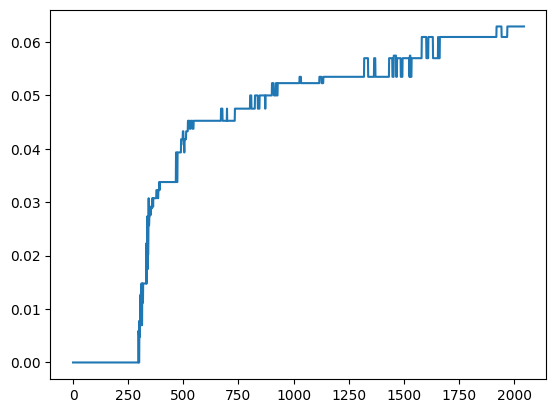

In [32]:
plt.plot(steps, bleu_score);

## Translation examples:

она примерно твоего роста ---> она примерно твоего в  
он тот самый человек которого я ищ у ---> он тот самый человек из болью у  
он на три года младше моего старше го брата ---> он на ко обязательно со в сидит тобой такой  
он изучает английский язык но он также изучает неме ц кий язык ---> он он пухлый может он он домашнюю он убийстве он костей может  
она вероятно до живёт до ста лет ---> она вероятно до команде до бывает лет  

### Fine-tune pretrained T5 (25 баллов)

Реализуйте Seq2seq Pretrained T5. Воспользуйтесь https://huggingface.co/docs/transformers/model_doc/t5 предобученной моделью. В качестве максимальной длинны возьмите предложения длинной **до 15 слов**, без каких либо префиксов. Архитектура модели(количетсво слоев, размерность и тд) остается на ваш выбор.

Не забудьте важные аспекты обучения модели:
* Взять готовый t5 токенизатор
* Resize matrix embedding - скорей всего ваша матрица эмбеддингов не будет включать эмбеддинги из вашего сета. Пример обновления матрицы эмбеддингов тут тут https://github.com/runnerup96/Transformers-Tuning/blob/main/t5_encoder_decoder.py
* Learning rate schedualer/Adafactor with constant learning rate


В качестве результатов, приложите слудующие данные:
1) Параметры обучения - learning rate, batch_size, epoch_num, pretrained model name
2) Графики обучения - train loss, val loss, bleu score
3) Примеры переводов вашей модели(10 штук) - source text, true target text, predicted target text

In [6]:
# CODE HERE